In [1]:
import pandas as pd
import numpy as np
import glob

In [2]:
dat = pd.DataFrame(np.load("distance_dat/pitch_players_data_team_0_10.npy"),columns=['X', 'Y'])

In [3]:
dat

,X,Y
0,5822.704590,2891.397461
1,6254.051758,5178.729492
2,8525.441406,5684.341797
3,8540.130859,3268.582031
4,7655.165527,4493.447266
5,10580.773438,3807.935791
6,9661.647461,5253.988281
7,9877.978516,4186.676758
8,10506.147461,4686.965820
9,10616.338867,4804.316406


In [4]:
# Dictionary to store DataFrames
data_frames = {}

# Path to the folder containing the .npy files
path = 'obfacc_0/pitch_players_data_team_0_*.npy'

# List all .npy files matching the pattern
file_list = glob.glob(path)

# Iterate over the files and load them into the dictionary
for file in file_list:
    # Extract the key from the filename
    key = int(file.split('_')[-1].split('.')[0])
    #print(key)
    data = np.load(file)
    # Convert to pandas DataFrame
    df = pd.DataFrame(data, columns=['X', 'Y'])
    # Store in the dictionary
    data_frames[key] = df



In [5]:
sorted_data_frames = dict(sorted(data_frames.items()))

In [6]:
lis = [key for key in sorted_data_frames.keys()]

In [7]:
len(lis)

316

In [9]:
for key in lis:
    if len(sorted_data_frames[key]) == 10:
        print(key, len(sorted_data_frames[key]))

20 10
23 10
24 10
25 10
27 10
28 10
29 10
30 10
32 10
33 10
34 10
35 10
36 10
37 10
38 10
39 10
40 10
41 10
42 10
43 10
44 10
45 10
46 10
47 10
48 10
50 10
57 10
63 10
64 10
65 10
66 10
67 10
68 10
77 10
78 10
79 10
81 10
82 10
83 10
84 10
86 10
88 10
89 10
90 10
91 10
92 10
93 10
94 10
96 10
97 10
98 10
99 10
100 10
101 10
102 10
103 10
104 10
105 10
106 10
107 10
108 10
109 10
110 10
111 10
112 10
113 10
114 10
115 10
116 10
117 10
118 10
119 10
120 10
121 10
122 10
123 10
124 10
126 10
127 10
128 10
135 10
136 10
137 10
138 10
139 10
140 10
141 10
142 10
145 10
146 10
151 10
152 10
153 10
156 10
172 10
173 10
174 10
175 10
176 10
178 10
193 10
194 10
203 10
205 10
206 10
207 10
208 10
209 10
210 10
211 10
212 10
213 10
214 10
215 10
216 10
217 10
218 10
219 10
221 10
222 10
224 10
229 10
231 10
232 10
236 10
239 10
240 10
241 10
242 10
245 10
247 10
248 10
249 10
250 10
252 10
261 10
319 10
321 10
324 10
325 10
328 10
329 10
330 10
331 10
337 10
338 10
339 10
340 10
341 10
342 10
34

In [10]:
first_key = lis[0]
sorted_data_frames[first_key]['ID'] = sorted_data_frames[first_key].index + 1

In [11]:
sorted_data_frames[first_key]

,X,Y,ID
0,4303.894531,1938.609619,1
1,7167.045410,4628.203125,2
2,4464.243652,6284.599609,3
3,6307.180664,5774.364746,4
4,6889.070312,1950.115845,5
5,7362.400391,3017.557129,6
6,6354.052246,3632.976074,7
7,7042.429688,3380.856445,8
8,5319.722656,3091.437256,9
9,4523.478516,3880.376709,10


In [10]:
previous_df = sorted_data_frames[first_key]

for key in list(sorted_data_frames.keys())[1:]:
    current_df = sorted_data_frames[key]
    ids = []
    used_ids = set()
    
    for i, row in current_df.iterrows():
        distances = np.linalg.norm(previous_df[['X', 'Y']].values - row[['X', 'Y']].values, axis=1)
        sorted_indices = np.argsort(distances)
        
        # Find the closest available ID
        for idx in sorted_indices:
            candidate_id = previous_df.iloc[idx]['ID']
            if candidate_id not in used_ids:
                ids.append(candidate_id)
                used_ids.add(candidate_id)
                break
    
    current_df['ID'] = ids
    previous_df = current_df




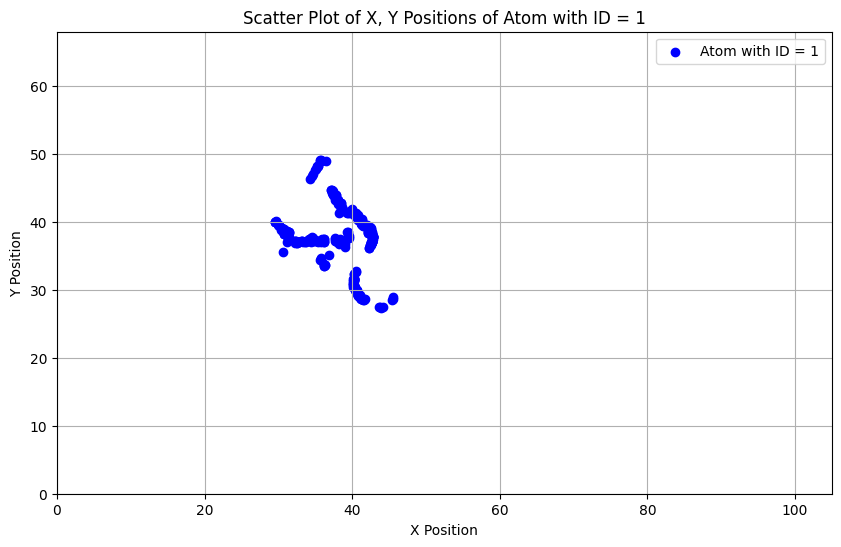

316


In [11]:
import matplotlib.pyplot as plt

# Create lists to store x and y positions
x_positions = []
y_positions = []

# Iterate over the sorted dictionary to extract positions
for key in lis:
    df = sorted_data_frames[key]
    filtered_df = df[df['ID'] == 10]
    x_positions.append(filtered_df['X'].values[0])
    y_positions.append(filtered_df['Y'].values[0])


# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(np.array(x_positions)*105/12000, np.array(y_positions)*68/7000, c='blue', label='Atom with ID = 1')
plt.title('Scatter Plot of X, Y Positions of Atom with ID = 1')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.xlim(0,105)
plt.ylim(0,68)
plt.grid(True)
plt.show()


print(len(x_positions))

In [12]:

# Create dictionaries to store x and y positions for each atom
positions = {i: {'t':[],'x': [], 'y': []} for i in range(1, 11)}

# Iterate over the sorted dictionary to extract positions for each atom
for key in lis:
    #print(f"Key=={key}")
    df=sorted_data_frames[key]
    for atom_id in range(1, 11):
        #print(f"Atom_id == {atom_id}")
        filtered_df = df[df['ID'] == atom_id]
        positions[atom_id]['t'].append(key)
        positions[atom_id]['x'].append(filtered_df['X'].values[0])
        positions[atom_id]['y'].append(filtered_df['Y'].values[0])



316
20


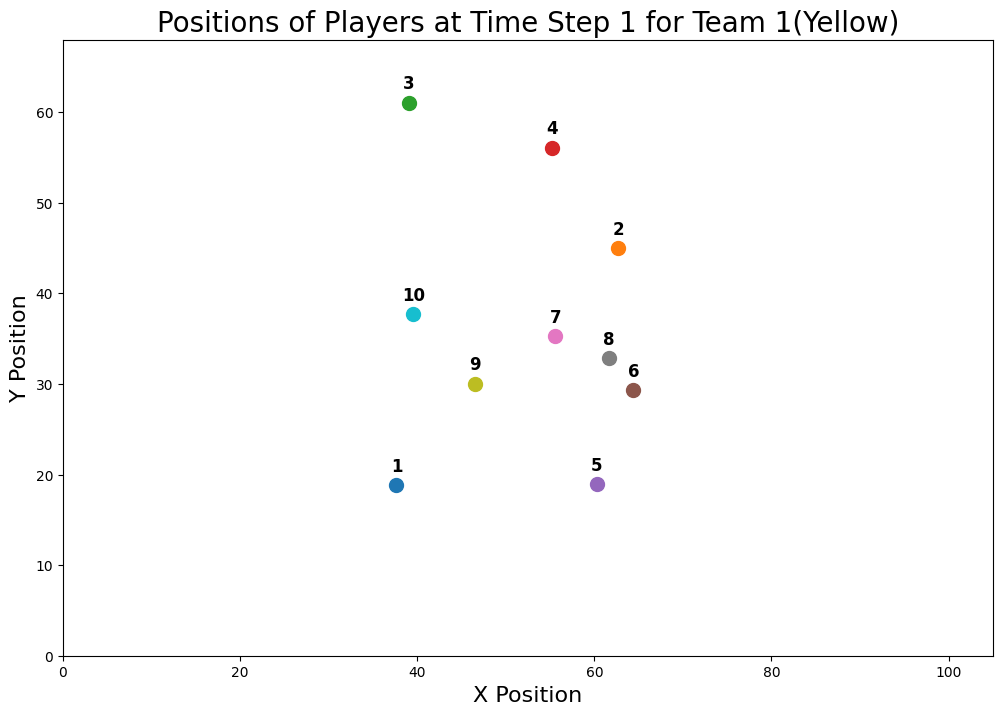

In [38]:
import matplotlib.pyplot as plt

# Number of time steps (assuming all sequences are of the same length)
num_time_steps = len(next(iter(positions.values()))['x'])
print(num_time_steps)

# Create plots for each time step
for t in range(num_time_steps):
    print(positions[1]['t'][t])
    plt.figure(figsize=(12, 8))
    for atom_id in range(1, 11):
        plt.scatter(positions[atom_id]['x'][t]*105/12000, positions[atom_id]['y'][t]*68/7000, s=100, label=f'Atom ID {atom_id}')
        plt.annotate(f'{atom_id}', (positions[atom_id]['x'][t]*105/12000, positions[atom_id]['y'][t]*68/7000), textcoords="offset points",fontweight='bold', fontsize=12, xytext=(0,10), ha='center')
    plt.title(f'Positions of Players at Time Step {t+1} for Team 1(Yellow)',fontsize=20)
    plt.xlabel('X Position',fontsize=16)
    plt.ylabel('Y Position', fontsize=16)
    #plt.legend()
    #plt.grid(True)
    plt.xlim(0,105)
    plt.ylim(0,68)
    plt.show()
    break



In [15]:
lis[0:4]

[20, 23, 24, 25]

FRAME NUMBER = 24


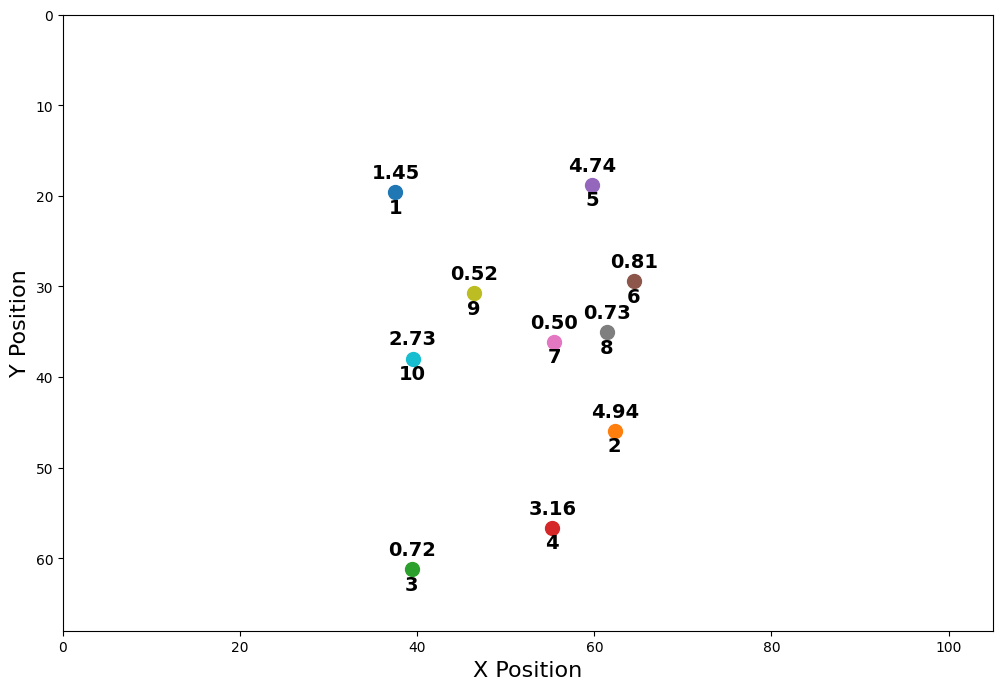

In [43]:
import matplotlib.pyplot as plt
import os

# Create a target folder for the images
target_folder = 'plots-obfacc'
os.makedirs(target_folder, exist_ok=True)

# Create plots for each time step
for t in range(2, 3):
    print(f"FRAME NUMBER = {positions[1]['t'][t]}")
    plt.figure(figsize=(12, 8))
    for atom_id in range(1, 11):
        
        x_pos = positions[atom_id]['x'][t] * 105 / 12000
        y_pos = positions[atom_id]['y'][t] * 68 / 7000
        
        # Scatter plot point
        plt.scatter(x_pos, y_pos, s=100, label=f'Atom ID {atom_id}')
        
        # Annotate player ID below the data point
        plt.annotate(f'{atom_id}', (x_pos, y_pos), textcoords="offset points",fontweight='bold', fontsize=14, xytext=(0, -15), ha='center')
        
        # Annotate speed above the data point
        if t > 0:
            speed = speeds[atom_id][positions[atom_id]['t'][t]]
            plt.annotate(f'{speed:.2f}', (x_pos, y_pos), textcoords="offset points", fontweight='bold', fontsize=14, xytext=(0, 10), ha='center')
    
    plt.xlabel('X Position', fontsize=16)
    plt.ylabel('Y Position', fontsize=16)
    #plt.legend()
    #plt.grid(True)
    plt.xlim(0, 105)
    plt.ylim(0, 68)  # Invert the y-axis
    plt.gca().invert_yaxis()  # Ensure the y-axis is inverted
    plt.show()
    break



In [26]:
pip install  kaleido

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.8 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [27]:
import plotly.graph_objs as go
import plotly.io as pio
import os

# Create a target folder for the images
target_folder = 'plots-obfacc'
os.makedirs(target_folder, exist_ok=True)

# Create plots for each time step
for t in range(0, 3):
    print(f"FRAME NUMBER = {positions[1]['t'][t]}")
    fig = go.Figure()

    for atom_id in range(1, 11):
        x_pos = positions[atom_id]['x'][t] * 105 / 12000
        y_pos = positions[atom_id]['y'][t] * 68 / 7000
        
        # Scatter plot point
        fig.add_trace(go.Scatter(
            x=[x_pos], y=[y_pos],
            mode='markers+text',
            text=f'{atom_id}',
            textposition='bottom center',
            marker=dict(size=10),
            name=f'Atom ID {atom_id}'
        ))
        
        # Annotate speed above the data point
        if t > 0:
            speed = speeds[atom_id][positions[atom_id]['t'][t]]
            fig.add_trace(go.Scatter(
                x=[x_pos], y=[y_pos],
                mode='text',
                text=f'{speed:.2f}',
                textposition='top center',
                showlegend=False
            ))
    
    fig.update_layout(
        title=f'Positions of Players at Time Step {t+1} for Team 1 (Yellow)',
        xaxis=dict(title='X Position', range=[0, 105]),
        yaxis=dict(title='Y Position', range=[68, 0]), # Invert the y-axis
        showlegend=False
    )

    # Save the plot as an image
    pio.write_image(fig, os.path.join(target_folder, f'plot_{t}.png'))

    fig.show()
    break


FRAME NUMBER = 20


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [16]:

# Initialize a dictionary to store cumulative distances for each atom
cumulative_distances = {i: 0 for i in range(1, 11)}

# Iterate through each atom's positions
for atom_id in range(1, 11):
    x_positions = positions[atom_id]['x']
    y_positions = positions[atom_id]['y']
    for t in np.arange(1, len(x_positions)):
        # Calculate the Euclidean distance between successive points
        distance = np.sqrt(((x_positions[t]- x_positions[t-1])*105/12000)**2 + ((y_positions[t] - y_positions[t-1])*68/7000)**2)
        # Add to the cumulative distance
        cumulative_distances[atom_id] += distance

# Print the cumulative distances for each atom
for atom_id, distance in cumulative_distances.items():
    print(f'Cumulative distance for Atom ID {atom_id}: {distance}')


Cumulative distance for Atom ID 1: 111.41155044243848
Cumulative distance for Atom ID 2: 64.73349859772885
Cumulative distance for Atom ID 3: 75.146332550541
Cumulative distance for Atom ID 4: 62.0128181663149
Cumulative distance for Atom ID 5: 99.95720678851313
Cumulative distance for Atom ID 6: 73.46365475697623
Cumulative distance for Atom ID 7: 83.32860984787126
Cumulative distance for Atom ID 8: 62.91281108398088
Cumulative distance for Atom ID 9: 75.13558976086986
Cumulative distance for Atom ID 10: 97.2465456603624


In [17]:
import numpy as np

def calculate_speeds(positions):
    speeds = {atom_id: {} for atom_id in positions.keys()}
    
    for atom_id, data in positions.items():
        times = data['t']
        x_positions = data['x']
        y_positions = data['y']
        
        for i in range(1, len(times)):
            # Calculate distance covered between timesteps
            distance = np.sqrt(((x_positions[i] - x_positions[i-1])*105/12000)**2 + ((y_positions[i] - y_positions[i-1])*68/7000)**2)
            # Calculate time difference
            time_diff = (times[i] - times[i-1])*30/750
            # Calculate speed
            speed = distance / time_diff
            # Save speed with the current time as the key
            speeds[atom_id][times[i]] = speed
    
    return speeds



speeds = calculate_speeds(positions)





In [18]:
speeds[1].keys()

dict_keys([23, 24, 25, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 57, 63, 64, 65, 66, 67, 68, 77, 78, 79, 81, 82, 83, 84, 86, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 135, 136, 137, 138, 139, 140, 141, 142, 145, 146, 151, 152, 153, 156, 172, 173, 174, 175, 176, 178, 193, 194, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 224, 229, 231, 232, 236, 239, 240, 241, 242, 245, 247, 248, 249, 250, 252, 261, 319, 321, 324, 325, 328, 329, 330, 331, 337, 338, 339, 340, 341, 342, 343, 344, 345, 348, 349, 350, 351, 352, 354, 355, 356, 357, 358, 359, 360, 361, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 

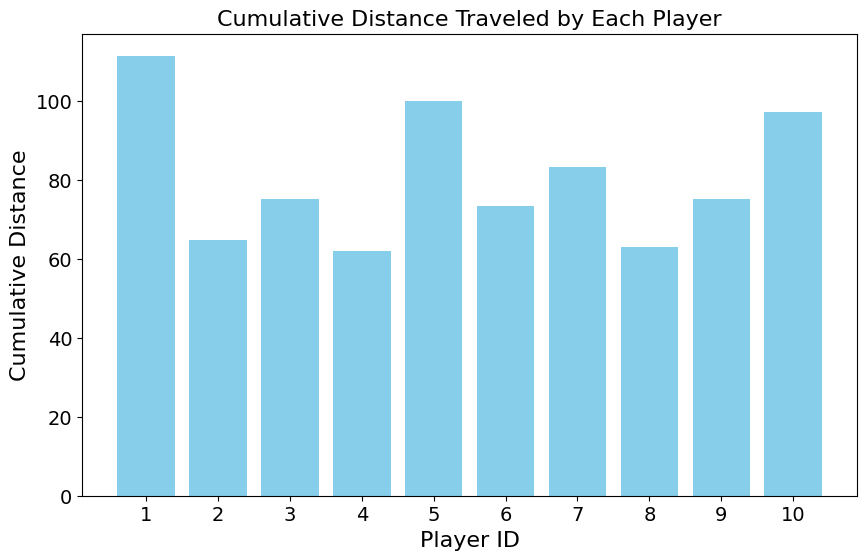

In [37]:

# Extract atom IDs and distances
atom_ids = list(cumulative_distances.keys())
distances = list(cumulative_distances.values())

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(atom_ids, distances, color='skyblue')
plt.xlabel('Player ID', fontsize=16)
plt.ylabel('Cumulative Distance',fontsize=16)
plt.title('Cumulative Distance Traveled by Each Player', fontsize=16)
plt.xticks(atom_ids, fontsize=14)
plt.yticks(fontsize=14)
#plt.grid(True)
plt.show()


In [21]:
import matplotlib.pyplot as plt
import os

# Create a target folder for the images
target_folder = 'plots-obfacc'
os.makedirs(target_folder, exist_ok=True)

# Number of time steps (assuming all sequences are of the same length)
num_time_steps = len(next(iter(positions.values()))['t'])

# Create plots for each time step
for t in range(num_time_steps):
    plt.figure(figsize=(12, 8))
    for atom_id in range(1, 12):
        plt.scatter(positions[atom_id]['x'][t]*105/12000, positions[atom_id]['y'][t]*68/7000, s=100, label=f'Atom ID {atom_id}')
        plt.annotate(f'{atom_id}', (positions[atom_id]['x'][t]*105/12000, positions[atom_id]['y'][t]*68/7000), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title(f'Scatter Plot of X, Y Positions of Atoms at Time Step {t+1}')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    #plt.legend()
    plt.grid(True)
    plt.xlim(0,105)
    plt.ylim(0,68)
    plt.savefig(os.path.join(target_folder, f'plot_{t+1}.png'))
    plt.close()


In [33]:
import cv2
import os

# Set the path to the folder containing the images
image_folder = "./plots-obfacc"
# Set the name and path for the output video file
video_name = 'id_video_long.mp4'

# Get a list of all files in the image folder
images = [img for img in os.listdir(image_folder) if img.endswith(".png") or img.endswith(".jpg")]



# Sort the images by name, especially to handle the numerical order
images.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))

# Read the first image to get the size
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(video_name, fourcc, 10, (width, height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

# Release the VideoWriter
video.release()

print(f'Video saved as {video_name}')

Video saved as id_video_long.mp4


In [26]:
def find_longest_consecutive_sequence(lis):
    longest_sequence = []
    current_sequence = [lis[0]]
    
    for i in range(1, len(lis)):
        if lis[i] == lis[i-1] + 1:
            current_sequence.append(lis[i])
        else:
            if len(current_sequence) > len(longest_sequence):
                longest_sequence = current_sequence
            current_sequence = [lis[i]]
    
    # Check the last sequence
    if len(current_sequence) > len(longest_sequence):
        longest_sequence = current_sequence
    
    return longest_sequence

# Example usage
longest_sequence = find_longest_consecutive_sequence(lis)
print(f'The longest consecutive sequence is: {longest_sequence}')


The longest consecutive sequence is: [370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460]


In [27]:
def find_longest_consecutive_sequence(lis):
    longest_sequence = []
    longest_start_index = 0
    longest_end_index = 0
    current_sequence = [lis[0]]
    current_start_index = 0

    for i in range(1, len(lis)):
        if lis[i] == lis[i-1] + 1:
            current_sequence.append(lis[i])
        else:
            if len(current_sequence) > len(longest_sequence):
                longest_sequence = current_sequence
                longest_start_index = current_start_index
                longest_end_index = i - 1
            current_sequence = [lis[i]]
            current_start_index = i

    # Check the last sequence
    if len(current_sequence) > len(longest_sequence):
        longest_sequence = current_sequence
        longest_start_index = current_start_index
        longest_end_index = len(lis) - 1

    return longest_sequence, longest_start_index, longest_end_index


longest_sequence, start_index, end_index = find_longest_consecutive_sequence(lis)
print(f'The longest consecutive sequence is: {longest_sequence}')
print(f'Start index: {start_index}, End index: {end_index}')


The longest consecutive sequence is: [370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460]
Start index: 166, End index: 256


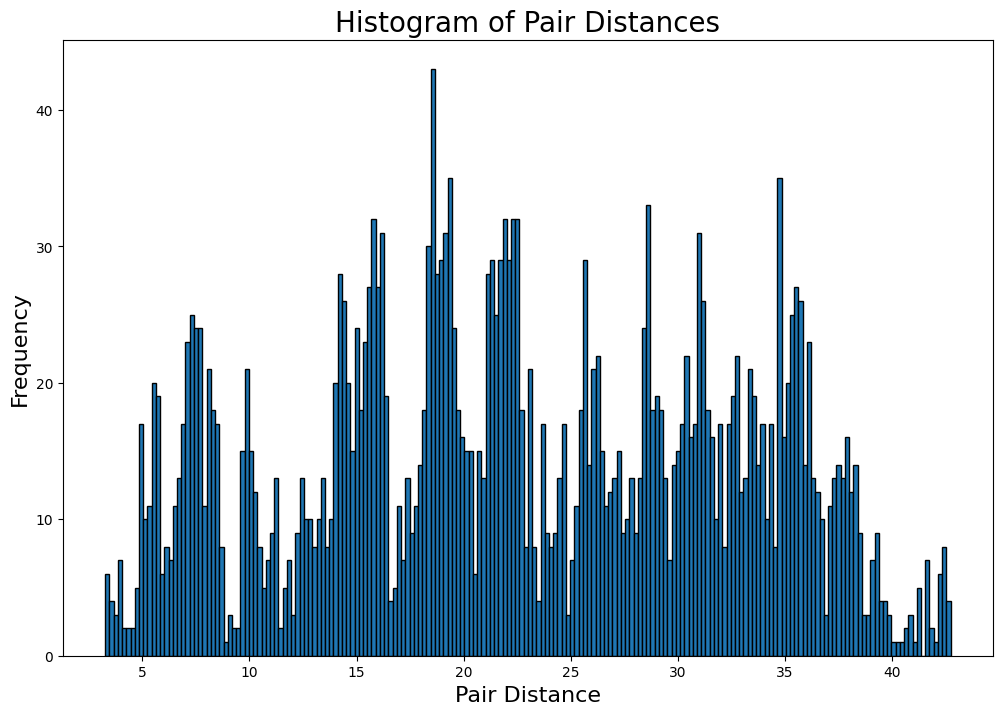

Total Pair Distances Calculated: 2844


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import math

# Assuming positions is a dictionary with atom IDs as keys and another dictionary with 'x' and 'y' positions as values

# List to store pair distances
pair_distances = []

# Iterate through each time step
for t in range(len(positions[1]['t'])):
    x1 = positions[1]['x'][t] * 105 / 12000
    y1 = positions[1]['y'][t] * 68 / 7000    # Mirror the y-axis
    
    for atom_id in range(2, 11):
        
        x_pos = positions[atom_id]['x'][t] * 105 / 12000
        y_pos = positions[atom_id]['y'][t] * 68 / 7000   # Mirror the y-axis
        
        # Calculate distance between atom ID 1 and the current atom
        distance = math.sqrt((x1 - x_pos) ** 2 + (y1 - y_pos) ** 2)
        pair_distances.append(distance)

# Create a histogram of the pair distances
plt.figure(figsize=(12, 8))
plt.hist(pair_distances, bins=200, edgecolor='black')
plt.xlabel('Pair Distance', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Histogram of Pair Distances', fontsize=20)
plt.show()f

print(f'Total Pair Distances Calculated: {len(pair_distances)}')
